## Import Packages 

In [1]:
# Note: This code was obtained from Github and edited to be trained and run on the Apple stock price dataset
# The original code can be found here: https://github.com/kairess/stock_crypto_price_prediction


import pandas as pd # Loading CSV file
import numpy as np # Computing rows and columns
import matplotlib.pyplot as plt # Data visualization
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


## Load Dataset

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-31,126.089996,126.489998,124.360001,124.430000,114.507881,42090600
1,2015-04-01,124.820000,125.120003,123.099998,124.250000,114.342239,40621400
2,2015-04-02,125.029999,125.559998,124.190002,125.320000,115.326912,32220100
3,2015-04-06,124.470001,127.510002,124.330002,127.349998,117.195030,37194000
4,2015-04-07,127.639999,128.119995,125.980003,126.010002,115.961906,35012300


##  Compute Mid Price

In [5]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

## Create Windows

In [6]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

## Normalize Data

In [7]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1087, 50, 1), (121, 50, 1))

## Define a Model

In [8]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


## Training

In [9]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 1087 samples, validate on 121 samples
Epoch 1/20
1087/1087 [==============================] - 10s 9ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 2/20
1087/1087 [==============================] - 9s 8ms/step - loss: 7.1491e-04 - val_loss: 0.0012
Epoch 3/20
1087/1087 [==============================] - 9s 8ms/step - loss: 5.4346e-04 - val_loss: 7.7059e-04
Epoch 4/20
1087/1087 [==============================] - 9s 8ms/step - loss: 4.0301e-04 - val_loss: 0.0013
Epoch 5/20
1087/1087 [==============================] - 9s 9ms/step - loss: 3.5638e-04 - val_loss: 6.4243e-04
Epoch 6/20
1087/1087 [==============================] - 9s 8ms/step - loss: 2.9885e-04 - val_loss: 6.6829e-04
Epoch 7/20
1087/1087 [==============================] - 9s 8ms/step - loss: 2.6545e-04 - val_loss: 5.5304e-04
Epoch 8/20
1087/1087 [==============================] - 9s 8ms/step - loss: 2.5020e-04 - val_loss: 5.2228e-04
Epoch 9/20
1087/1087 [==================

## Prediction

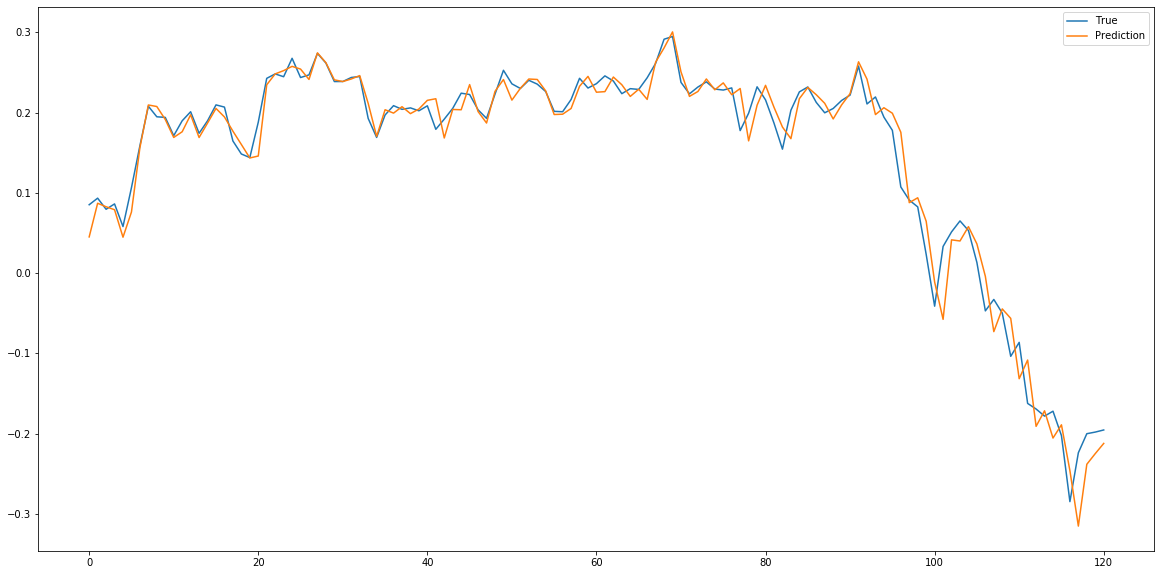

In [10]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()